In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [2]:
df = pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.shape

(26967, 11)

#### The data set contains 26967 row, 11 columns .In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

##### Exept depth, in all the column there is non null value. Count of null value is 697.


In [8]:
df.isnull().sum()/df.index.size*100

Unnamed: 0    0.00000
carat         0.00000
cut           0.00000
color         0.00000
clarity       0.00000
depth         2.58464
table         0.00000
x             0.00000
y             0.00000
z             0.00000
price         0.00000
dtype: float64

In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


### There are  object data type (cut, color,clarity)

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [13]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [14]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

In [15]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 33


In [16]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26958, 10)
After (26925, 10)


In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [18]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col


numeric_columns = numeric_features(df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

Numeric Features:
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [19]:
def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

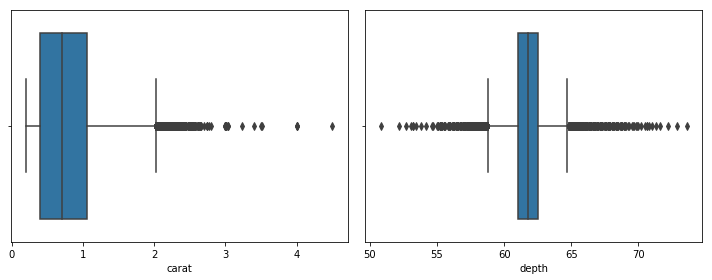

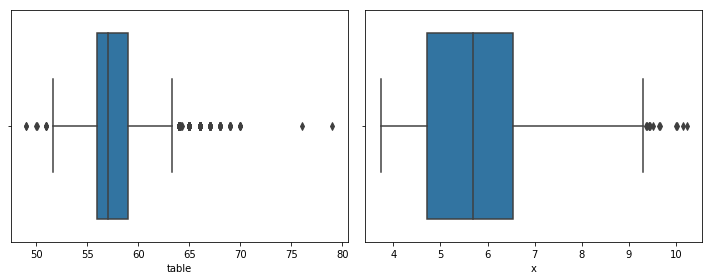

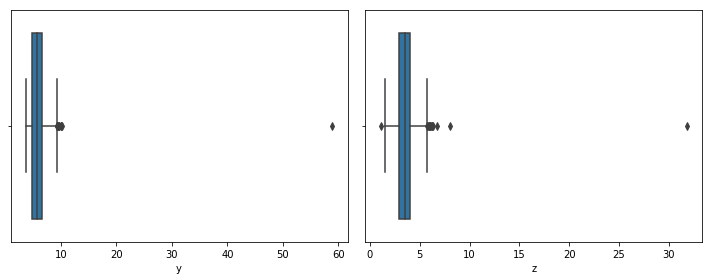

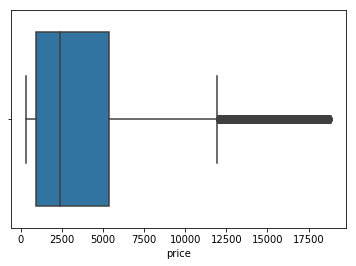

In [20]:
plot_box_plots(df)

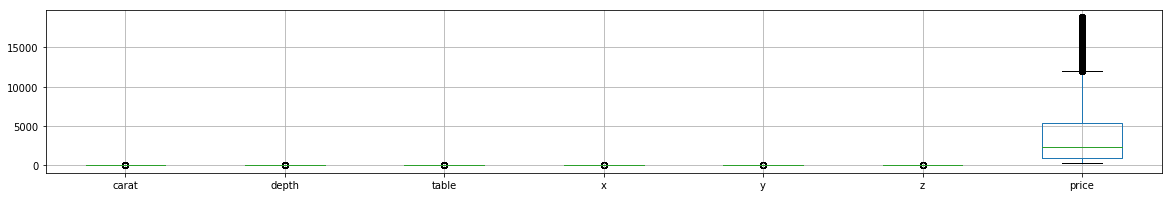

In [21]:
df.boxplot(figsize= (20,3))

In [22]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df)

carat --------- 655
depth --------- 1217
table --------- 317
x --------- 12
y --------- 12
z --------- 14
price --------- 1777


In [23]:
from scipy.stats.mstats import winsorize

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    

In [26]:
df2 = treat_outliers(df)

In [27]:
print(detect_outliers(df2))

carat --------- 0
depth --------- 0
table --------- 0
x --------- 0
y --------- 0
z --------- 0
price --------- 0
None


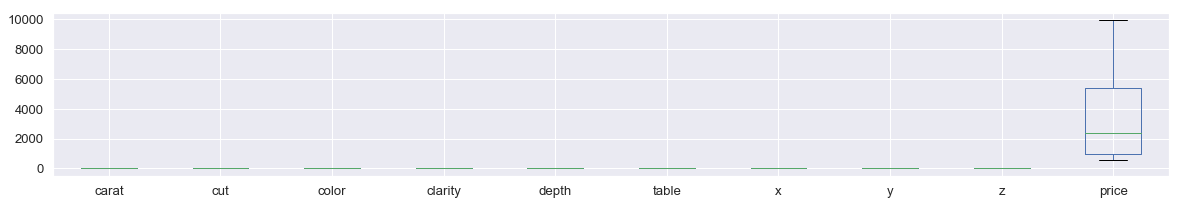

In [76]:
df2.boxplot(figsize= (20,3))

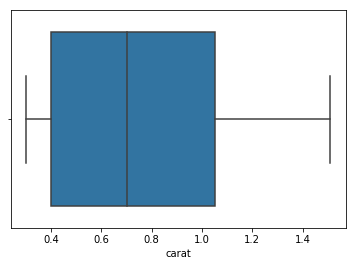

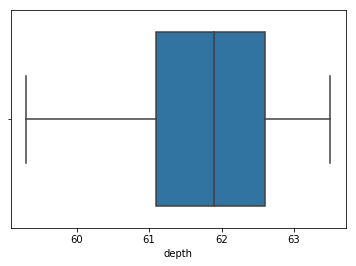

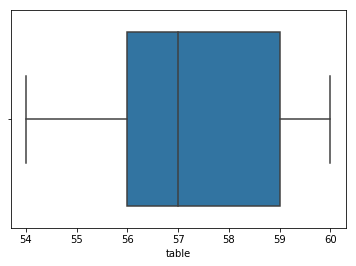

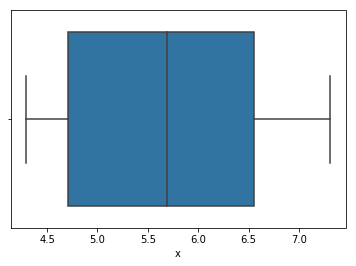

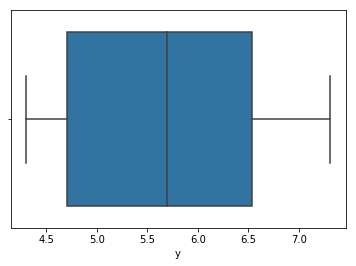

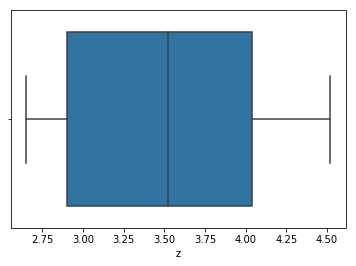

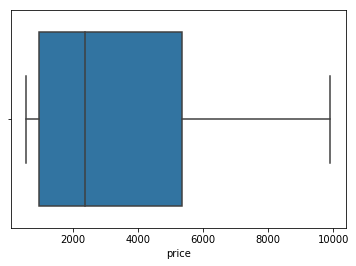

In [28]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

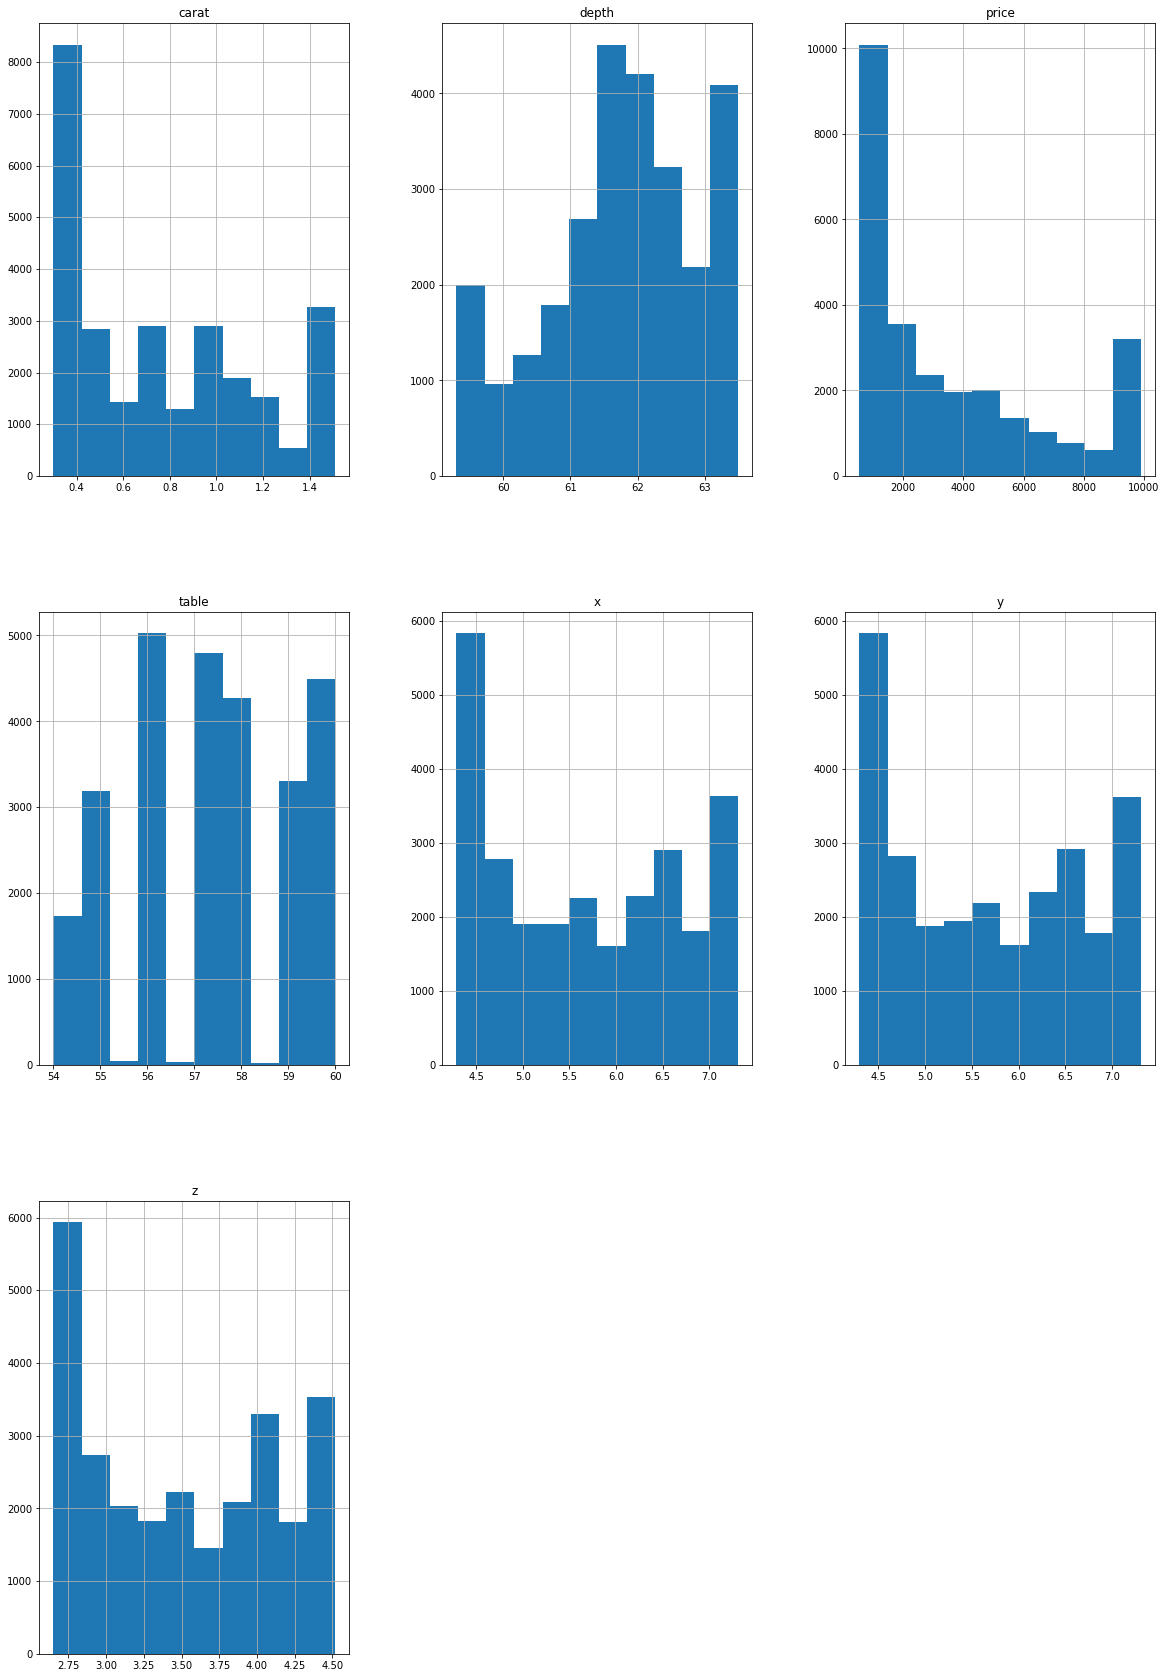

In [29]:
df2.hist(figsize=(20,30));

In [30]:
df2.skew() 

carat    0.502746
depth   -0.408395
table   -0.015381
x        0.132898
y        0.132633
z        0.135138
price    0.917782
dtype: float64

### The target feature "price" are heavily "right-skewed".

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


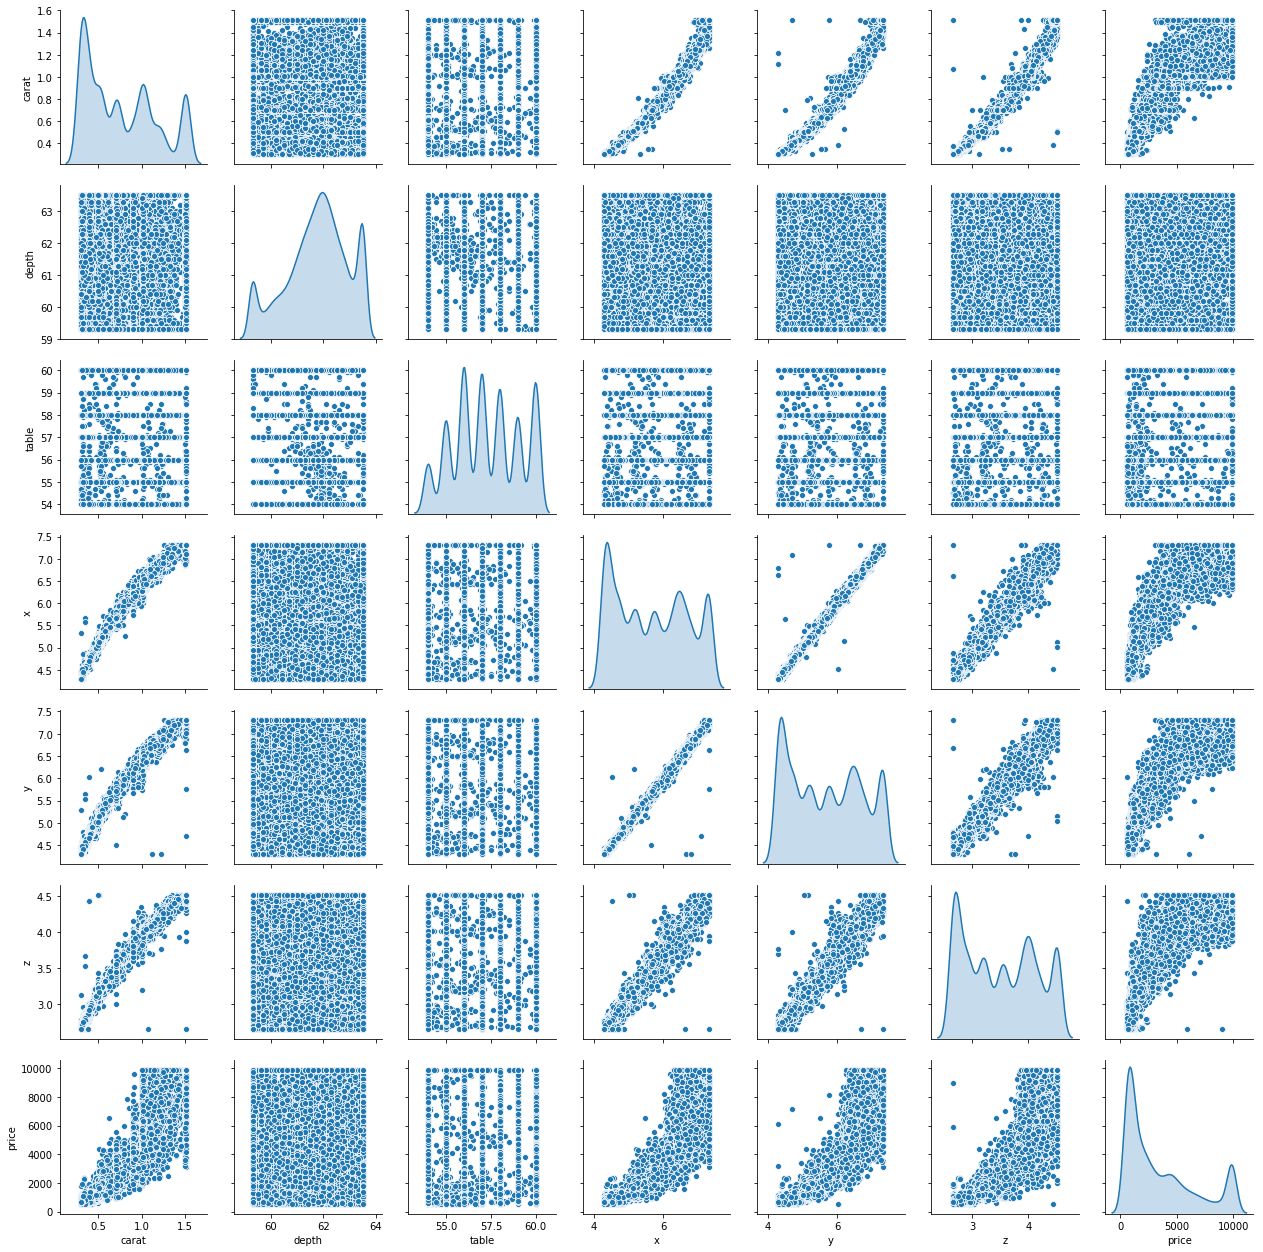

In [31]:
df2_attr = (df2)
sns.pairplot(df2_attr, diag_kind='kde')  
plt.show()

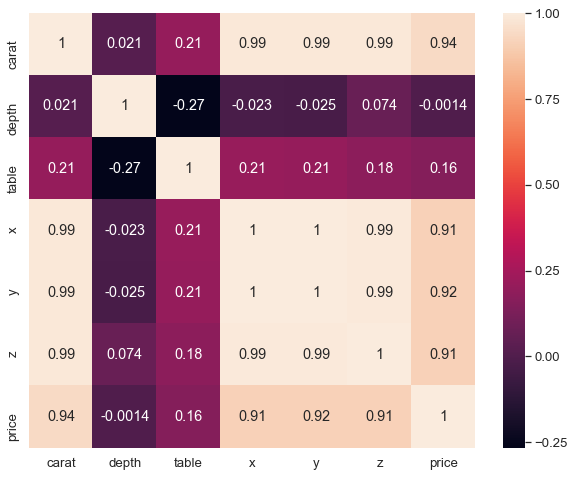

In [32]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df2[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x','y','z','price']].corr(), annot=True)

### The variable 'carat', 'x','y', 'z' correlates with target variable 'price' .

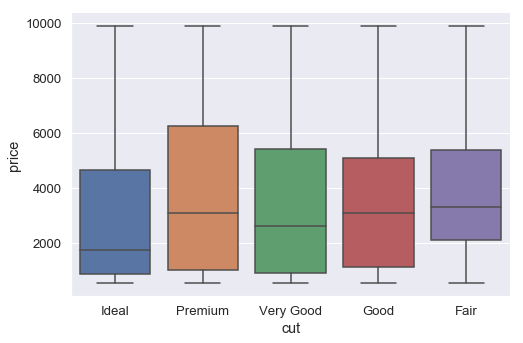

In [33]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=1.5)

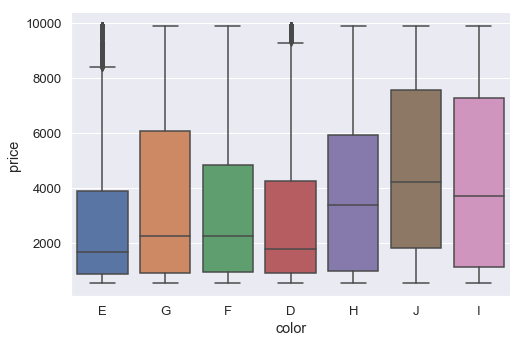

In [34]:
sns.catplot(x='color', y='price', data=df, aspect =1.5, kind='box')

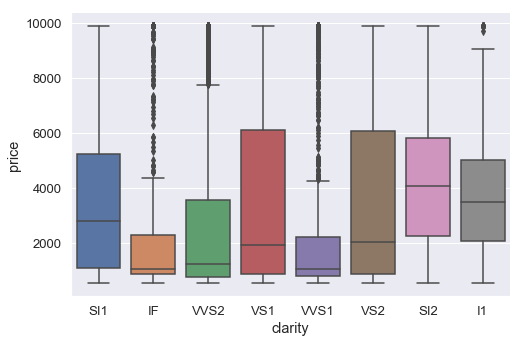

In [35]:
sns.catplot(x='clarity', y='price', data=df2, aspect =1.5, kind='box')

In [36]:
df2.mean()

carat       0.768501
depth      61.766258
table      57.286633
x           5.686578
y           5.689475
z           3.512172
price    3569.125757
dtype: float64

In [37]:
df2 = df2.fillna(df2.mean())

In [38]:
df2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [39]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




In [40]:
df2['cut']=np.where(df2['cut'] =='Ideal', '4', df2['cut'])
df2['cut']=np.where(df2['cut'] =='Premium', '3', df2['cut'])
df2['cut']=np.where(df2['cut'] =='Very Good', '2', df2['cut'])
df2['cut']=np.where(df2['cut'] =='Good', '1', df2['cut'])
df2['cut']=np.where(df2['cut'] =='Fair', '0', df2['cut'])

In [41]:
df2['color']=np.where(df2['color'] =='D', '6', df2['color'])
df2['color']=np.where(df2['color'] =='E', '5', df2['color'])
df2['color']=np.where(df2['color'] =='F', '4', df2['color'])
df2['color']=np.where(df2['color'] =='G', '3', df2['color'])
df2['color']=np.where(df2['color'] =='H', '2', df2['color'])
df2['color']=np.where(df2['color'] =='I', '1', df2['color'])
df2['color']=np.where(df2['color'] =='J', '0', df2['color'])

In [42]:
df2['clarity']=np.where(df2['clarity'] =='IF', '7', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VVS1', '6', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VVS2', '5', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VS1', '4', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='VS2', '3', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='SI1', '2', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='SI2', '1', df2['clarity'])
df2['clarity']=np.where(df2['clarity'] =='I1', '0', df2['clarity'])

In [43]:
df2['cut'] = df2['cut'].astype('float64')
df2['color'] = df2['color'].astype('float64')
df2['clarity'] = df2['clarity'].astype('float64')

In [44]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.29,4.30,2.66,544
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
carat      26925 non-null float64
cut        26925 non-null float64
color      26925 non-null float64
clarity    26925 non-null float64
depth      26925 non-null float64
table      26925 non-null float64
x          26925 non-null float64
y          26925 non-null float64
z          26925 non-null float64
price      26925 non-null int64
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


In [46]:
X = df2.drop('price', axis=1)
Y = df2[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.29,4.30,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [47]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 12165.822464848681
The coefficient for cut is 106.51493799486475
The coefficient for color is 217.05590054270326
The coefficient for clarity is 348.78200221114685
The coefficient for depth is 8.228366861643874
The coefficient for table is -21.182482160348457
The coefficient for x is -1940.3672251483774
The coefficient for y is 1186.609121518815
The coefficient for z is -1437.309209281564


In [50]:
# Let us check the intercept for the model
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2142.1746382196725


In [51]:
# R square on training data
regression_model.score(X_train, y_train)

0.9381845880910002

###### 94% of the variation in the log_price is explained by the predictors in the model for train set

In [52]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

766.7476323246534

In [53]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

767.3860552453051

In [54]:
# R square on test data
regression_model.score(X_test, y_test)

0.9390427010465159

### Linear Regression using statsmodels

In [55]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2.0,6.0,1.0,63.5,56.0,6.30,6.38,4.06,5166
20181,0.67,1.0,1.0,3.0,60.7,60.0,5.60,5.64,3.41,1708
4712,0.76,1.0,3.0,2.0,59.3,60.0,6.05,5.97,3.47,2447
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618


In [56]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [57]:
expr= 'price ~ carat + color + clarity +depth + table + x + y + z'

In [58]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept     5455.149549
carat        12218.909253
color          217.295741
clarity        355.155049
depth           -9.858793
table          -52.892961
x            -1700.315831
y             1080.471482
z            -1691.165594
dtype: float64

In [59]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 3.509e+04
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:48:34   Log-Likelihood:            -1.5209e+05
No. Observations:               18847   AIC:                         3.042e+05
Df Residuals:                   18838   BIC:                         3.043e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5455.1495    595.472      9.161      0.0

In [60]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [61]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

773.3232344348934

In [62]:
np.sqrt(lm1.mse_resid) #another way

773.5079429501534

In [63]:
y_pred = lm1.predict(data_test)

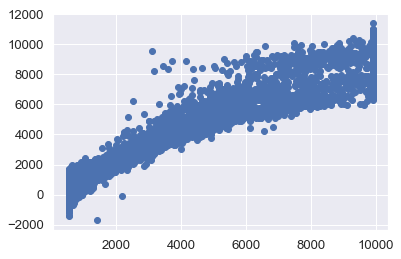

In [64]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [65]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(5455.15) * Intercept + (12218.91) * carat + (217.3) * color + (355.16) * clarity + (-9.86) * depth + (-52.89) * table + (-1700.32) * x + (1080.47) * y + (-1691.17) * z + 

In [66]:
from scipy.stats import zscore

In [67]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [68]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.5850608652167664
The coefficient for cut is 0.038424043304385445
The coefficient for color is 0.11994562675381916
The coefficient for clarity is 0.1864865464166745
The coefficient for depth is 0.0030743847793799485
The coefficient for table is -0.012500744840802531
The coefficient for x is -0.6411776403988202
The coefficient for y is 0.3901196560585322
The coefficient for z is -0.2937021702282973


In [70]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.2577061658186334e-16


In [71]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9390031716621876

### Check Multi-collinearity using VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [74]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 186.65577393978742
cut ---> 9.863359517942193
color ---> 5.51335956289841
clarity ---> 5.389085317002533
depth ---> 1508.0961183110196
table ---> 1047.7362599098678
x ---> 12882.417675898188
y ---> 11431.26411987584
z ---> 4398.2450017018045


In [75]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2.0,6.0,1.0,63.5,56.0,6.30,6.38,4.06,5166
20181,0.67,1.0,1.0,3.0,60.7,60.0,5.60,5.64,3.41,1708
4712,0.76,1.0,3.0,2.0,59.3,60.0,6.05,5.97,3.47,2447
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618
